# Useful Packages

Some of these packages may NOT be included in your installation.  Whenever you need to install a package, you need to use the Miniforge prompt or temrinal window, **NOT Python itself**.  The Miniforge Prompt window can be reached through the Windows Start Menu folder for Miniforge3 or right clicking and opening a terminal from Applications > Utilities > Terminal on Mac.

Installing packages known to conda can be done with the `conda install <package name>` command in your Miniforge Prompt window.  Otherwise you may need to use a different manager like `pip install <package name>`.

<a href="https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-pkgs.html">More information about managing packages in Python is available here.</a>


**Data Packages**
* <a href="https://numpy.org/">NumPy</a> for numerical computation in Python
* <a href="https://scikit-learn.org/stable/">scikit-learn</a> for data analysis and machine learning

**Other Utilities**
* <a href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/#">Beautiful Soup</a> for parsing HTML etc
* <a href="https://www.nltk.org/index.html">NLTK</a> for text analysis
* <a href="https://pillow.readthedocs.io/en/stable/#">Pillow</a> for Images
* <a href="https://joblib.readthedocs.io/en/latest/">JobLib</a> or <a href="https://docs.python.org/3/library/multiprocessing.html">Multiprocessing</a> for running parallel/concurrent jobs

## Conda envs

conda provides the option to create separate Python environments inside your installation. All of the code below should be run in the Miniforge Prompt or Terminal:

(PC) Start Menu > Miniforge3 > Miniforge Prompt
(Mac) Finder > Applications > Utilities > Terminal

`conda create --name myenv python=3.5` creates an environment called `myenv` with Python version 3.5 instead of your main installation version.

`conda activate myenv` makes this environment active.  From here you can install packages, and open software (e.g. `spyder` will open spyder after installation).

`conda deactivate` deactivates the active environment and returns to your base environment.

Conda environments are a great place to test out code, or run code that has very specific requirements.  It's generally a good idea to be careful about vastly changing your environment (e.g. upgrading to a new version of Python), because it can break your project code!  Environments provide a great way to test before making the change in your main environment.

[Read more about conda environments](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#)

## Numpy

[Numpy](http://www.numpy.org/) provides the mathematical functionality (e.g. large arrayes, linear algebra, random numbers, etc.) for many popular statistical and machine learning tasks in Python.  This is a dependency for many of the packages we discuss below, including pandas.  One of the foundational objects in numpy is the array:

In [1]:
import numpy as np
import pandas as pd
a_list = [[1,2],[3,4]] #list of ROWS
an_array = np.array(a_list, ndmin = 2)
a_dataframe = pd.DataFrame(a_list)

In [2]:
a_list

[[1, 2], [3, 4]]

In [3]:
an_array

array([[1, 2],
       [3, 4]])

In [4]:
a_dataframe

,0,1
0,1,2
1,3,4


However, arrays in numpy are constrained to a single data type, unlike lists or DataFrames.

In [5]:
import numpy as np
import pandas as pd
a_list = [[1,"cat"],[3,"dog"]] #list of ROWS
an_array = np.array(a_list, ndmin = 2)
a_dataframe = pd.DataFrame(a_list)

In [6]:
pd.DataFrame(a_list).dtypes

0     int64
1    object
dtype: object

In [7]:
pd.DataFrame(an_array).dtypes

0    object
1    object
dtype: object

We can use numpy to do many numerical tasks, for example creating random values or matrices/DataFrames:

In [8]:
np.random.rand(2,2)

array([[0.24312638, 0.69881168],
       [0.38190719, 0.91511864]])

In [9]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [10]:
np.ones((4,3,2))

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

Arrays make many mathematical operations easier than base Python.  For example if we want to add a single value to every element of a list, we could try:

In [11]:
[1,2]+3

TypeError: can only concatenate list (not "int") to list

To accomplish this in base Python, we instead need to use a comprehension (maybe even with an if statement if the data types vary!):

In [12]:
base_list = [1,2]
[k+3 for k in base_list]

[4, 5]

In [13]:
base_list = [1,2,"three"]
[k+3 for k in base_list if type(k)==int] #in this case we can use "int" because all values are integers
[k+3 for k in base_list if str(k).isnumeric()] #note that the .isnumeric() method is only available for str objects

[4, 5]

With numpy arrays, we can use:

In [14]:
np.array([1,2])+3

array([4, 5])

or

In [15]:
arr = np.array([1,2])
arr += 3
print(arr)

[4 5]


Since the pandas dataframes are built on numpy arrays:

In [16]:
pd.DataFrame([1,2])+3

,0
0,4
1,5


<a href="https://docs.scipy.org/doc/scipy/reference/">`SciPy`</a> adds an array of mathematical and statistical functions that work with `numpy` objects. 

## [Pandas and Data Visualization Packages](Pandas.html)

See our dedicated lesson on Pandas (linked above).

## scikit-learn

scikit-learn provides a consolidated interface for machine learning in Python:
* functions for splitting data into training and testing components
* cross validation for model tuning
* supervised and unsupervised modeling
* model fit assessment and comparison

[Read more about using sklearn](https://scikit-learn.org/stable/tutorial/).  Digging into the application of machine learning is beyond the scope of our workshop series.

The following example comes from Scitkit-learn's [Linear Regression Example page](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

In [17]:
# !conda install scikit-learn

from sklearn import linear_model, datasets
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [938.23786125]


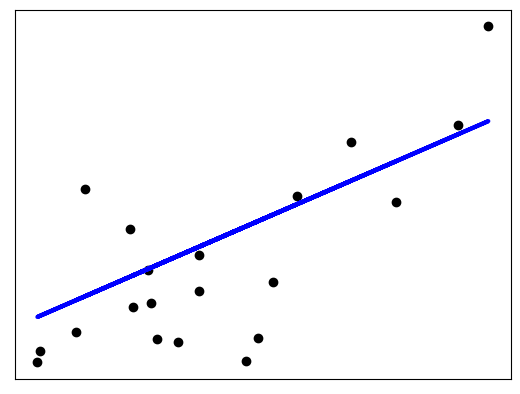

In [18]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## BeautifulSoup (for parsing HTML or XML data)

Python's built-in `urllib.request` package makes it relatively easy to download the underlying html from a web page. Note that the `from <package> import <function>` notation used here allows you to selectively import only parts of a package as needed.

Be sure to check the terms of services for any website before scraping! We're scraping our own materials here to be safe!

In [19]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
page = urlopen("https://unc-libraries-data.github.io/Python/Intro/Introduction.html")  #The Python 1 materials!
html = page.read()
print(html[:300]) #print only the first 300 characters

b'<!DOCTYPE html>\n<html>\n<head><meta charset="utf-8" />\n\n<title>Introduction</title>\n\n<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.1.10/require.min.js"></script>\n<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js"></script>\n\n\n\n<style type="text/css">\n   '


In [20]:
soup=BeautifulSoup(html,"html.parser")
[x.text for x in soup.find_all("h2")] # find all h2 (second-level headers)

['Why Python?¶',
 'Getting Started¶',
 'Data Types and Variables¶',
 'Flow Control¶',
 'More Data Types¶',
 'Review¶',
 'Pseudocode and Comments¶',
 'User-defined Functions¶',
 'Coming up¶',
 'References and Resources¶']

## APIs

APIs (Application Programming Interfaces) provide a structured way to request data over the internet. APIs are generally a better option than web scraping because:
* they provided structured data instead of often inconsistent HTML or other formats you'll have to dig through to find relevant information
    + this often has the added benefit of not taxing a website as much as web scraping!
* they provide a clearer path to retrieving information with permission

An API call is just a specific type of web address that you can use Python to help you generate (or cycle through many options):<br>
For example: [https://api.weather.gov/points/35.9132,-79.0558](https://api.weather.gov/points/35.9132,-79.0558)<br>
This link pulls up the National Weather Service information for a particular lat-long pair (for Chapel Hill). The forecast field leads us to a new link:<br>
[https://api.weather.gov/gridpoints/LWX/96,70/forecast](https://api.weather.gov/gridpoints/LWX/96,70/forecast)

We can use Python to request and parse the content from these links, but often we can find a [wrapper someone else has created](https://github.com/paulokuong/noaa) to do some of that work for us!<br>

Remember that we can install packages in the Miniforge Prompt or Terminal:
* (PC) Start Menu > Miniforge3 > Miniforge Prompt  
* (Mac) Finder > Applications > Utilities > Terminal  

Then run the following to install the package:<br>
`pip install noaa_sdk`

In [21]:
# !pip install noaa_sdk

from noaa_sdk import NOAA
from time import sleep

n = NOAA()
forecast = n.points_forecast(35.9132,-79.0558, type='forecastGridData')
sleep(5) #pause for 5 seconds to prevent repeatedly using the API

This provides us with a pretty complicated set of nested dictionaries that we can parse to find specific values:

<AxesSubplot:xlabel='validTime'>

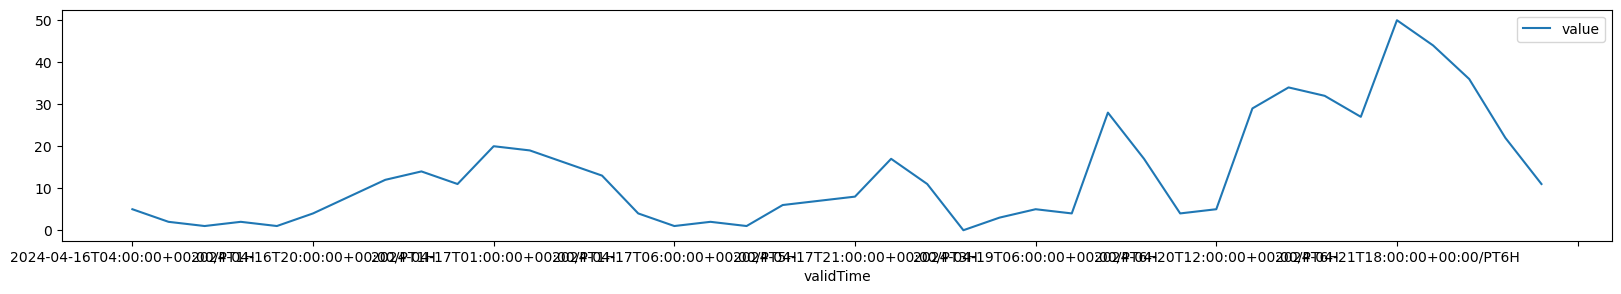

In [22]:
rain_chance = forecast["properties"]["probabilityOfPrecipitation"]["values"]
pd.DataFrame(rain_chance).plot.line(x="validTime",y="value", figsize=(20,3))

## NLTK (text analysis)

<a href="http://www.nltk.org/">The Natural Language Toolkit (`nltk`)</a> provides a wide array of tools for processing and analyzing text.  This includes operations like splitting text into sentences or words ("tokenization"), tagging them with their part of speech, classification, and more.

Let's take the example sentence:
"The quick brown fox jumps over the lazy dog."
and convert it into individual words.

In [23]:
import nltk
#the code below is necessary for word_tokenize and parts of speech to work
# nltk.download("punkt")
# nltk.download('averaged_perceptron_tagger')
sentence = "The quick brown fox jumps over the lazy dog."
words = nltk.word_tokenize(sentence)
print(words)

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.']


Now we can extract the part of speech for each word in the sentence.  Note that this function, like many of the functions in NLTK, uses machine learning to classify each word and therefore may have some level of error!

In [24]:
nltk.pos_tag(words)

[('The', 'DT'),
 ('quick', 'JJ'),
 ('brown', 'NN'),
 ('fox', 'NN'),
 ('jumps', 'VBZ'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'JJ'),
 ('dog', 'NN'),
 ('.', '.')]

The meaning of these parts of speech tags are available below:

In [25]:
# nltk.download('tagsets')
# nltk.help.upenn_tagset()

**[Read more about getting data for Text and Data Mining projects via the Libraries.](https://guides.lib.unc.edu/tdm/home)**

## PIL (Pillow)

[Pillow](https://pillow.readthedocs.io/en/stable/) is the updated version of the old Python Imaging Library (PIL), which provides fundamental tools for working with images.  Pillow can work with a many common formats (some of which may require extra packages or other dependencies) to automate a wide variety of image transformations.

Note: While `pillow` is how you install the package, you import functions with `import PIL`.

Both `display` and `imshow` can be used to preview the image. Currently, `display` returns some errors due to the image's modes, so we're using `imshow` to avoid these errors. Read more about [modes](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes).


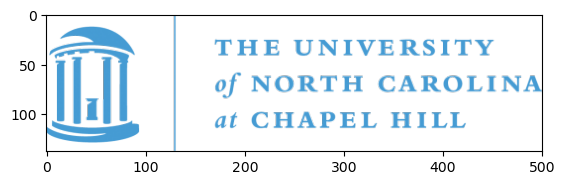

In [26]:
from PIL import Image
from urllib.request import urlretrieve
from matplotlib.pyplot import imshow
from IPython.display import display


#downloading an image locally
urlretrieve("https://identity.unc.edu/wp-content/uploads/sites/885/2019/01/UNC_logo_webblue-e1517942350314.png",
           "UNC_logo.png")

UNC = Image.open("UNC_logo.png")
#note: // divides two numbers and rounds the result down to get an integer
UNC_gray = UNC.convert('LA').resize((UNC.width//2,UNC.height//2))
imshow(UNC)

Mode "LA" is grayscale, preserving transparent image areas.

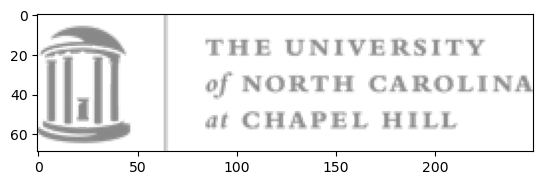

In [27]:
imshow(UNC_gray)

## Parallel Processing with joblib

As you move into more complicated processes in Python (or applying code to a wide variety of objects or files), processing time can become a major factor.  Fortunately, most modern laptops have multiple processor cores that can do separate things at the same time.  Python only uses **one core** by default.  If you have a set of loops that don't depend on each other (e.g. processing lots of files one after another), you could split up your many loop iterations between processors to greatly increase speed.

The [`joblib` package](https://joblib.readthedocs.io/en/latest/) provides a straightforward way to split loops up between your computers cores for faster performance on complicated code.  Note that parallelization may not benefit you much or may even hurt you for very quick jobs because setting up and consolidating information from separate cores creates overhead costs. 
